In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv("spam.csv",encoding='latin1')

In [3]:
df

,spam,text,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [4]:
df = df.rename(columns={'text':'Message', 'spam':'Category'})

In [5]:
df

,Category,Message,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [6]:
df.columns

Index(['Category', 'Message', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [7]:
df.info

<bound method DataFrame.info of      Category                                            Message Unnamed: 2  \
0         ham  Go until jurong point, crazy.. Available only ...        NaN   
1         ham                      Ok lar... Joking wif u oni...        NaN   
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3         ham  U dun say so early hor... U c already then say...        NaN   
4         ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...       ...                                                ...        ...   
5567     spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568      ham              Will Ì_ b going to esplanade fr home?        NaN   
5569      ham  Pity, * was in mood for that. So...any other s...        NaN   
5570      ham  The guy did some bitching but I acted like i'd...        NaN   
5571      ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unn

In [8]:
df.isna().sum()

Category         0
Message          0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [9]:
df['Spam']=df['Category'].apply(lambda x:1 if x=='spam' else 0)

In [10]:
df

,Category,Message,Unnamed: 2,Unnamed: 3,Unnamed: 4,Spam
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,0
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,1
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,0
...,...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN,1
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN,0
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN,0
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN,0


In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(df.Message,df.	Category	, test_size = 0.25)

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

In [13]:
from sklearn.pipeline import Pipeline
clf = Pipeline([
    ('vectorizer',CountVectorizer()),
    ('nb',MultinomialNB())
])

In [14]:
MultinomialNB_score = (clf, X_train, X_test, y_train, y_test)

In [15]:
clf.fit(X_train,y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('nb', MultinomialNB())])

In [16]:
emails = [
    'Sounds great! Are you home now?',
    'Will u meet ur dream partner soon? Is ur career off 2 a flyng start? 2 find out free, txt HORO followed by ur star sign, e. g. HORO ARIES'
]

In [17]:
predictions = clf.predict(emails)
print(predictions)


['ham' 'spam']


In [18]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = clf.predict(X_test)


print("Classification Report")
print(classification_report(y_test,y_pred))

Classification Report
              precision    recall  f1-score   support

         ham       0.99      1.00      1.00      1201
        spam       0.99      0.95      0.97       192

    accuracy                           0.99      1393
   macro avg       0.99      0.97      0.98      1393
weighted avg       0.99      0.99      0.99      1393



In [19]:
print("Confusion Matrix")
print(confusion_matrix(y_test,y_pred))

Confusion Matrix
[[1200    1]
 [  10  182]]


In [20]:
accuracy = clf.score(X_test,y_test)
print(f"Accuracy on the test set: {accuracy:.2%}")

Accuracy on the test set: 99.21%


In [21]:
spread = df['Category'].value_counts()
plt.rcParams['figure.figsize'] = (5,5)

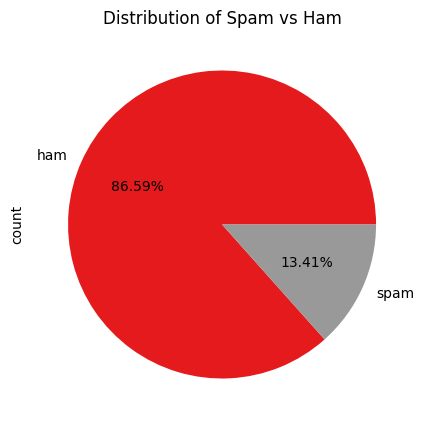

In [22]:
spread.plot(kind = 'pie', autopct='%1.2f%%', cmap='Set1')
plt.title(f'Distribution of Spam vs Ham')
plt.show()